# 06/03/20
# This notebook investigates an alternative calculation for dark matter fraction using SLACS X's analysis of 73 SLACS elliptical galaxies.
### They use a mass at half the effective radius $M_{r_e/2}$ to approximate the mass enclosed within the Einstein radius.
### The relationship of logs of $M_*$ to $M_{r_e/2}$ is linear:
### $log(M_*/(10^{10})) = 0.81*log(M_{r_e/2}/(10^{10})) + 0.35$
### $log(M_{r_e/2}) = (log(M_*) - 2.25)/(0.81)$

## I don't think this works correctly the way I have set this up. Total mass estimates are two orders of magnitude greater. I will have to try this again.

# Other relation used (which I probably should have done in the first place) is this:
### $f_{dm} = 0.13 * log(M_*/(10^{11} M_{sol}))+ 0.54$
### Mean is 0.55 +/- 0.10

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from astropy import constants as const
c = const.c.to('km/s').value #c in km/s
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011

In [15]:
spec = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_latest.csv')
mac = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_latest.csv')
zoo = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_latest.csv')

In [9]:
# total mass taken from f_dm = 0.61
(1/0.39 * spec.STELLAR_MASS)

0     7.756410e+10
1              NaN
2     2.199487e+11
3     3.653846e+10
4     2.168205e+11
5              NaN
6     3.115385e+11
7     3.779487e+11
8     1.233846e+10
9              NaN
10    1.096154e+11
11    9.351282e+10
12    2.173333e+10
13             NaN
14    3.392308e+11
15    2.102051e+11
16    6.887180e+11
17             NaN
18    3.697436e+11
19    2.009231e+11
20             NaN
21             NaN
22             NaN
23    3.830769e+09
24             NaN
25    1.323590e+11
26    3.582051e+11
27    2.221026e+11
28             NaN
29             NaN
30             NaN
31             NaN
32             NaN
33    3.687179e+11
34             NaN
35             NaN
36    2.653846e+11
37    2.331795e+11
38    1.566923e+11
39    2.756410e+10
40    3.202564e+11
41    2.245898e+09
42    8.017949e+10
43    4.428205e+11
44    6.330769e+10
45    7.156410e+10
46    2.351026e+11
Name: STELLAR_MASS, dtype: float64

In [166]:
# total mass within half the effective radius taken from Auger09 relation
spec['log_enclosed_mass'] = ((np.log10(spec.STELLAR_MASS) - 2.25)/0.81)
mac['log_enclosed_mass'] = ((np.log10(mac.STELLAR_MASS) - 2.25)/0.81)
zoo['log_enclosed_mass'] = ((np.log10(zoo.STELLAR_MASS) - 2.25)/0.81)
print(mac.log_enclosed_mass.describe(),
      np.log10(mac.STELLAR_MASS.describe()))

count    47.000000
mean     11.206164
std       0.332154
min      10.088603
25%      11.020544
50%      11.215127
75%      11.447510
max      11.935646
Name: log_enclosed_mass, dtype: float64 count     1.672098
mean     11.399159
std      11.159722
min      10.421768
25%      11.176814
50%      11.334253
75%      11.522509
max      11.917873
Name: STELLAR_MASS, dtype: float64


(10, 14)

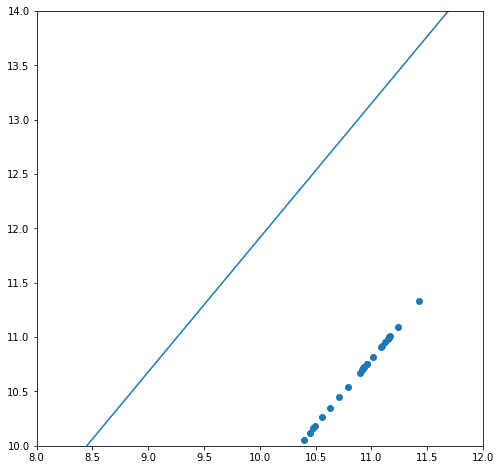

In [115]:
x = np.linspace(8, 12, 1000)

fig = plt.figure(figsize = (8, 8))
ax = plt.subplot()
ax.scatter(np.log10(spec.STELLAR_MASS), spec.log_enclosed_mass)
ax.plot(x, (x-0.35)/(0.81))
ax.set_xlim(8, 12)
ax.set_ylim(10, 14)

In [134]:
# Okay... so if I estimate theta_E with this, what does that look like?

from astropy import constants as const
c = const.c.to('km/s').value #c in km/s
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011

M = 10**(spec.log_enclosed_mass) # total mass assuming theta_E ~ 1/2 effective radius
Z1 = spec.z1
Z2 = spec.z2

# mass term
A = (M/(10**11.09))**(1/2)
# distances term, h0*1000 gives km/Gpc*s
# if Zsource = 2*Zlens... Zsource*Zlens/(Zsource-Zlens) becomes 2*Zlens
B = ((c/(h0*1000))*((Z1 * Z2 / abs(Z1 - Z2))))**(-1.2)#(2*Z))**(-1/2)
spec['theta_e_auger'] = A*B #gives arcsecs

In [135]:
spec.theta_e_auger.describe()

count    31.000000
mean      0.250252
std       0.162126
min       0.057005
25%       0.166322
50%       0.203801
75%       0.324751
max       0.866412
Name: theta_e_auger, dtype: float64

In [136]:
# estimate einstein radius
M = 10**(mac.log_enclosed_mass)
Z = mac.Z
#Z2 = spec.z2

# mass term
A = (M/(10**11.09))**(1/2)
# distances term, h0*1000 gives km/Gpc*s
# if Zsource = 2*Zlens... Zsource*Zlens/(Zsource-Zlens) becomes 2*Zlens
B = ((c/(h0*1000))*(2*Z))**(-1/2)
mac['theta_e_auger'] = A*B #gives arcsecs

In [137]:
mac.theta_e_auger.describe()

count    47.000000
mean      0.773480
std       0.204511
min       0.436939
25%       0.617558
50%       0.782913
75%       0.887969
max       1.482360
Name: theta_e_auger, dtype: float64

In [138]:
# estimate einstein radius
M = 10**zoo.log_enclosed_mass
Z = zoo.Z
#Z2 = spec.z2

# mass term
A = (M/(10**11.09))**(1/2)
# distances term, h0*1000 gives km/Gpc*s
# if Zsource = 2*Zlens... Zsource*Zlens/(Zsource-Zlens) becomes 2*Zlens
B = ((c/(h0*1000))*(2*Z))**(-1/2)
zoo['theta_e_auger'] = A*B #gives arcsecs

In [140]:
zoo.theta_e_auger.describe()

count    36.000000
mean      0.586612
std       0.298236
min       0.256589
25%       0.375443
50%       0.497379
75%       0.684663
max       1.482360
Name: theta_e_auger, dtype: float64

## Calculate dark matter fraction from stellar mass.

In [16]:
spec['f_dm'] = 0.13 * np.log10(spec.STELLAR_MASS/(10**11)) + 0.54
mac['f_dm'] =  0.13 * np.log10(mac.STELLAR_MASS/(10**11)) + 0.54
zoo['f_dm'] =  0.13 * np.log10(zoo.STELLAR_MASS/(10**11)) + 0.54

all_dm = pd.concat([spec,mac,zoo])

In [17]:
print(spec.f_dm.describe(),
mac.f_dm.describe(),
zoo.f_dm.describe(),
     all_dm.f_dm.describe())

count    31.000000
mean      0.496219
std       0.077470
min       0.272519
25%       0.470222
50%       0.528782
75%       0.551774
max       0.595784
Name: f_dm, dtype: float64 count    47.000000
mean      0.582509
std       0.034976
min       0.464830
25%       0.562963
50%       0.583453
75%       0.607923
max       0.659323
Name: f_dm, dtype: float64 count    36.000000
mean      0.501054
std       0.041657
min       0.424943
25%       0.468991
50%       0.498834
75%       0.529484
max       0.599446
Name: f_dm, dtype: float64 count    114.000000
mean       0.533322
std        0.065913
min        0.272519
25%        0.494525
50%        0.536903
75%        0.582881
max        0.659323
Name: f_dm, dtype: float64


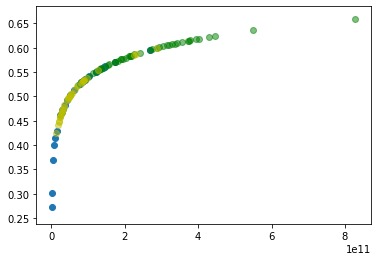

In [18]:
fig, ax = plt.subplots()
ax.scatter(spec.STELLAR_MASS, spec.f_dm)
ax.scatter(mac.STELLAR_MASS, mac.f_dm, color = 'g', alpha = 0.5)
ax.scatter(zoo.STELLAR_MASS, zoo.f_dm, color = 'y', alpha = 0.5)

In [19]:
M = spec.STELLAR_MASS/(1 - spec.f_dm) 
Z1 = spec.z1
Z2 = spec.z2

# mass term
A = (M/(10**11.09))**(1/2)
# distances term, h0*1000 gives km/Gpc*s
# if Zsource = 2*Zlens... Zsource*Zlens/(Zsource-Zlens) becomes 2*Zlens
B = ((c/(h0*1000))*((Z1 * Z2 / abs(Z1 - Z2))))**(-1.2)#(2*Z))**(-1/2)
spec['theta_e_auger'] = A*B #gives arcsecs

In [20]:
print(spec.theta_e_auger.describe(),
     spec.theta_e2.describe())
# small differences worth checking out, but they're still close. This is better.

count    31.000000
mean      0.486546
std       0.308161
min       0.138951
25%       0.304045
50%       0.402855
75%       0.632412
max       1.574635
Name: theta_e_auger, dtype: float64 count    31.000000
mean      0.552863
std       0.349082
min       0.141461
25%       0.321726
50%       0.469898
75%       0.676612
max       1.674666
Name: theta_e2, dtype: float64


In [21]:
# estimate einstein radius
M = mac.STELLAR_MASS / (1 - mac.f_dm) 
Z = mac.Z
#Z2 = spec.z2

# mass term
A = (M/(10**11.09))**(1/2)
# distances term, h0*1000 gives km/Gpc*s
# if Zsource = 2*Zlens... Zsource*Zlens/(Zsource-Zlens) becomes 2*Zlens
B = ((c/(h0*1000))*(2*Z))**(-1/2)
mac['theta_e_auger'] = A*B #gives arcsecs

In [22]:
print(mac.theta_e_auger.describe(),
     mac.theta_e.describe())

count    47.000000
mean      1.371313
std       0.336329
min       0.823132
25%       1.120858
50%       1.370122
75%       1.570149
max       2.598708
Name: theta_e_auger, dtype: float64 count    47.000000
mean      1.408854
std       0.314145
min       0.907575
25%       1.185279
50%       1.387197
75%       1.560006
max       2.633636
Name: theta_e, dtype: float64


In [23]:
# estimate einstein radius
M = zoo.STELLAR_MASS/(1 - zoo.f_dm) 
Z = zoo.Z
#Z2 = spec.z2

# mass term
A = (M/(10**11.09))**(1/2)
# distances term, h0*1000 gives km/Gpc*s
# if Zsource = 2*Zlens... Zsource*Zlens/(Zsource-Zlens) becomes 2*Zlens
B = ((c/(h0*1000))*(2*Z))**(-1/2)
zoo['theta_e_auger'] = A*B #gives arcsecs

In [24]:
print(zoo.theta_e_auger.describe(),
     zoo.theta_e.describe(),
      len(zoo[zoo.theta_e_auger < 0.65]))

count    36.000000
mean      1.111961
std       0.512332
min       0.539449
25%       0.741549
50%       0.957538
75%       1.291523
max       2.598708
Name: theta_e_auger, dtype: float64 count    36.000000
mean      1.235352
std       0.510513
min       0.655049
25%       0.857438
50%       1.088444
75%       1.430692
max       2.633636
Name: theta_e, dtype: float64 7


/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


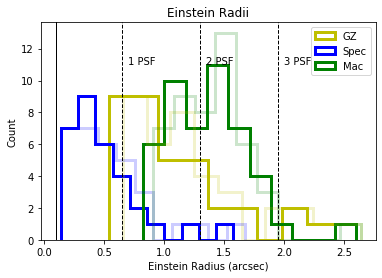

In [30]:
# Histogram of Einstein Radii
plt.xlabel("Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("Einstein Radii")
plt.hist(zoo.theta_e_auger,bins=10,color='y',label='GZ', histtype = 'step', linewidth=3)
plt.hist(spec.theta_e_auger,bins=10,color='b',label='Spec', histtype = 'step', linewidth=3)
plt.hist(mac.theta_e_auger,bins=10,color='g',label='Mac', histtype = 'step', linewidth=3)
#plt.hist(spec_121519.theta_e_chabrier,bins=10,color='b',label='GAMA', histtype = 'step', linewidth=3)
plt.legend(loc='upper right')
plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.axvline(0.1, color='k', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 11, '1 PSF')
plt.text(1.35, 11, '2 PSF')
plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/allmethods_theta_e.png')
plt.hist(zoo.theta_e,bins=10,color='y',label='GZ', histtype = 'step', linewidth=3, alpha = 0.2)
plt.hist(spec.theta_e2,bins=10,color='b',label='Spec', histtype = 'step', linewidth=3,  alpha = 0.2)
plt.hist(mac.theta_e,bins=10,color='g',label='Mac', histtype = 'step', linewidth=3,  alpha = 0.2)

plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/revised_theta_e_060320.png')

## Same calculations taking 32% of stellar mass to be what contributes to lensing.

In [156]:
M = 0.32*spec.STELLAR_MASS/(1 - spec.f_dm) 
Z1 = spec.z1
Z2 = spec.z2

# mass term
A = (M/(10**11.09))**(1/2)
# distances term, h0*1000 gives km/Gpc*s
# if Zsource = 2*Zlens... Zsource*Zlens/(Zsource-Zlens) becomes 2*Zlens
B = ((c/(h0*1000))*((Z1 * Z2 / abs(Z1 - Z2))))**(-1.2)#(2*Z))**(-1/2)
spec['theta_e_auger'] = A*B #gives arcsecs

In [157]:
print(spec.theta_e_auger.describe(),
     spec.theta_e2.describe())
# small differences worth checking out, but they're still close. This is better.

count    31.000000
mean      0.275232
std       0.174322
min       0.078602
25%       0.171994
50%       0.227889
75%       0.357746
max       0.890748
Name: theta_e_auger, dtype: float64 count    31.000000
mean      0.552863
std       0.349082
min       0.141461
25%       0.321726
50%       0.469898
75%       0.676612
max       1.674666
Name: theta_e2, dtype: float64


In [158]:
# estimate einstein radius
M = 0.32*mac.STELLAR_MASS / (1 - mac.f_dm) 
Z = mac.Z
#Z2 = spec.z2

# mass term
A = (M/(10**11.09))**(1/2)
# distances term, h0*1000 gives km/Gpc*s
# if Zsource = 2*Zlens... Zsource*Zlens/(Zsource-Zlens) becomes 2*Zlens
B = ((c/(h0*1000))*(2*Z))**(-1/2)
mac['theta_e_auger'] = A*B #gives arcsecs

In [159]:
print(mac.theta_e_auger.describe(),
     mac.theta_e.describe())

count    47.000000
mean      0.775732
std       0.190257
min       0.465634
25%       0.634053
50%       0.775058
75%       0.888210
max       1.470051
Name: theta_e_auger, dtype: float64 count    47.000000
mean      1.408854
std       0.314145
min       0.907575
25%       1.185279
50%       1.387197
75%       1.560006
max       2.633636
Name: theta_e, dtype: float64


In [160]:
# estimate einstein radius
M = 0.32*zoo.STELLAR_MASS/(1 - zoo.f_dm) 
Z = zoo.Z
#Z2 = spec.z2

# mass term
A = (M/(10**11.09))**(1/2)
# distances term, h0*1000 gives km/Gpc*s
# if Zsource = 2*Zlens... Zsource*Zlens/(Zsource-Zlens) becomes 2*Zlens
B = ((c/(h0*1000))*(2*Z))**(-1/2)
zoo['theta_e_auger'] = A*B #gives arcsecs

In [161]:
print(zoo.theta_e_auger.describe(),
     zoo.theta_e.describe())

count    36.000000
mean      0.629020
std       0.289819
min       0.305159
25%       0.419484
50%       0.541665
75%       0.730596
max       1.470051
Name: theta_e_auger, dtype: float64 count    36.000000
mean      1.235352
std       0.510513
min       0.655049
25%       0.857438
50%       1.088444
75%       1.430692
max       2.633636
Name: theta_e, dtype: float64


/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 7.,  9.,  8., 13.,  6.,  3.,  0.,  0.,  0.,  1.]),
 array([0.90757458, 1.08018069, 1.2527868 , 1.42539291, 1.59799901,
        1.77060512, 1.94321123, 2.11581734, 2.28842344, 2.46102955,
        2.63363566]),
 <a list of 1 Patch objects>)

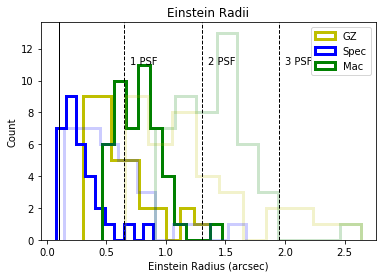

In [162]:
# Histogram of Einstein Radii
plt.xlabel("Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("Einstein Radii")
plt.hist(zoo.theta_e_auger,bins=10,color='y',label='GZ', histtype = 'step', linewidth=3)
plt.hist(spec.theta_e_auger,bins=10,color='b',label='Spec', histtype = 'step', linewidth=3)
plt.hist(mac.theta_e_auger,bins=10,color='g',label='Mac', histtype = 'step', linewidth=3)
#plt.hist(spec_121519.theta_e_chabrier,bins=10,color='b',label='GAMA', histtype = 'step', linewidth=3)
plt.legend(loc='upper right')
plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.axvline(0.1, color='k', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 11, '1 PSF')
plt.text(1.35, 11, '2 PSF')
plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/allmethods_theta_e.png')
plt.hist(zoo.theta_e,bins=10,color='y',label='GZ', histtype = 'step', linewidth=3, alpha = 0.2)
plt.hist(spec.theta_e2,bins=10,color='b',label='Spec', histtype = 'step', linewidth=3,  alpha = 0.2)
plt.hist(mac.theta_e,bins=10,color='g',label='Mac', histtype = 'step', linewidth=3,  alpha = 0.2)

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/revised_theta_e_060320.png')